In [110]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#!pip install ultralytics

In [8]:
from ultralytics import YOLO

# **1. Использование предобученной модели**

In [9]:
# загрузили предобученную модель YOLO11n
model = YOLO("yolo11n.pt")

In [15]:
# указываем путь к картинке
im_path = '/kaggle/input/stuffz/stuff.jpeg'
# предсказываем, что на картинке
#results = model.predict(im_path, show=True) # эта штука не работает в кэггле... облом
results = model(im_path, save=True, save_txt=True)


image 1/1 /kaggle/input/stuffz/stuff.jpeg: 384x640 3 persons, 1 car, 1 bus, 1 stop sign, 11.7ms
Speed: 2.4ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


['stuff.jpg', 'labels']

In [ ]:
#annotated = 'runs/detect/predict/stuff.jpg'
#labels = 'runs/detect/predict/labels/stuff.txt'

In [24]:
# получился список результатов
type(results)

list

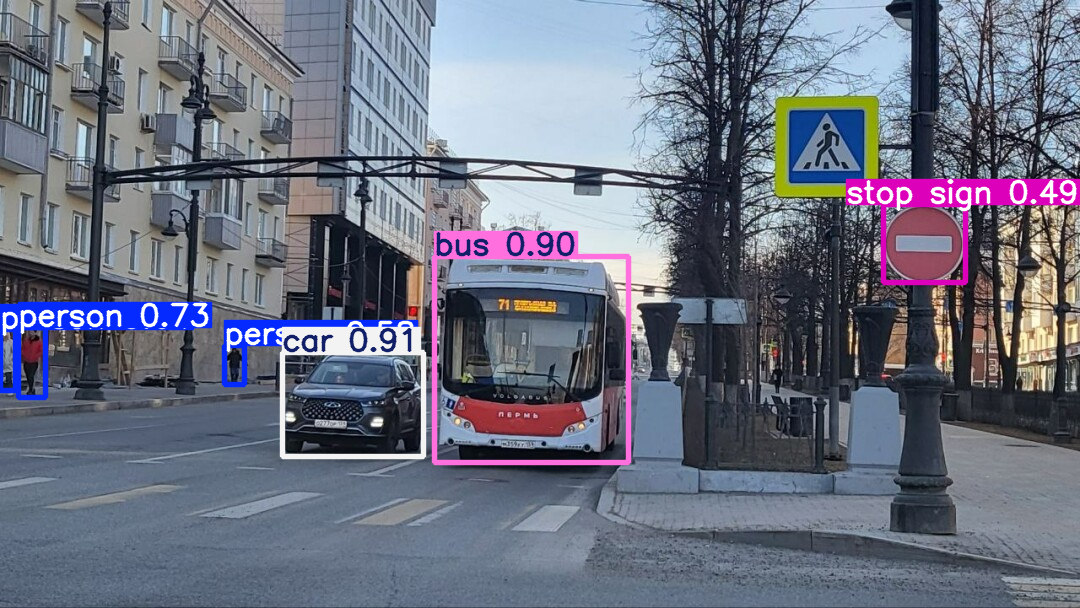

In [27]:
# посмотрим что там навыделяло
result = results[0]
result.show()
# ужасный comic sans, а в остальном красота

In [76]:
# берем инфу из boxes
classes = result.boxes.cls.cpu().numpy()    # id классов
confidences = result.boxes.conf.cpu().numpy()  # уверенность
bboxes = result.boxes.xyxy.cpu().numpy() # коррдинаты углов рамочек

In [78]:
for i, id in enumerate(classes):      
    print(f'Класс: {model.names[id]}')
    print(f'Левый верхний: [ {bboxes[i][0]:.2f}, {bboxes[i][1]:.2f} ]')
    print(f'Правый нижний: [ {bboxes[i][2]:.2f}, {bboxes[i][3]:.2f} ]')
    print(f'Уверенность: {confidences[i]:.2%}\n')

Класс: car
Левый верхний: [ 282.39, 352.98 ]
Правый нижний: [ 423.89, 456.18 ]
Уверенность: 91.46%

Класс: bus
Левый верхний: [ 434.42, 256.10 ]
Правый нижний: [ 628.20, 462.09 ]
Уверенность: 89.83%

Класс: person
Левый верхний: [ 18.58, 327.41 ]
Правый нижний: [ 45.54, 397.95 ]
Уверенность: 72.79%

Класс: person
Левый верхний: [ 0.10, 329.09 ]
Правый нижний: [ 15.70, 390.30 ]
Уверенность: 63.67%

Класс: person
Левый верхний: [ 224.50, 345.18 ]
Правый нижний: [ 244.70, 384.11 ]
Уверенность: 57.54%

Класс: stop sign
Левый верхний: [ 883.14, 204.68 ]
Правый нижний: [ 965.41, 282.74 ]
Уверенность: 48.70%



# **2. Подготовьте свой набор изображений железнодорожных вагонов, выполнив разметку с помощью Roboflow.**.


# 3. Обучите модель YOLO обнаруживать аннотированные части у вагонов вполученном наборе данных..

In [ ]:
#!pip install Roboflow

In [85]:
# грузим размеченный датасет с roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="фигушки")
project = rf.workspace("cv-390lk").project("test-0kyke")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [101]:
choo_choo = YOLO("yolo11n.pt")

In [99]:
yaml = '/kaggle/input/trains/data.yaml'

In [103]:
results = choo_choo.train(
    data = yaml,
    epochs=25, 
    imgsz=640,
    name = 'chugga_chugga'
)

Ultralytics 8.3.35 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/trains/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=chugga_chugga3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning /kaggle/input/trains/train/labels... 2093 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2093/2093 [00:02<00:00, 803.40it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/trains/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5890, len(boxes) = 9419. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/input/trains/valid/labels... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<00:00, 410.08it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/trains/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 564, len(boxes) = 901. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/chugga_chugga3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/chugga_chugga3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.31G      1.366      1.698       1.51         88        640: 100%|██████████| 131/131 [00:29<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all        196        901      0.378      0.447       0.38      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.95G      1.471        1.7      1.575        110        640: 100%|██████████| 131/131 [00:28<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all        196        901      0.416      0.382       0.37      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.86G      1.471      1.656      1.574        114        640: 100%|██████████| 131/131 [00:28<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]

                   all        196        901      0.713      0.331      0.346      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.88G      1.445      1.576      1.559        112        640: 100%|██████████| 131/131 [00:27<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.69it/s]

                   all        196        901      0.339      0.415      0.346      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.93G      1.415      1.527      1.529        106        640: 100%|██████████| 131/131 [00:27<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.15it/s]

                   all        196        901      0.444      0.435      0.412      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.83G        1.4      1.473      1.524         86        640: 100%|██████████| 131/131 [00:27<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]

                   all        196        901      0.426      0.509      0.438      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.88G      1.367      1.427      1.498        120        640: 100%|██████████| 131/131 [00:27<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]

                   all        196        901      0.474      0.511      0.453      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.88G      1.343      1.388      1.475         92        640: 100%|██████████| 131/131 [00:27<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.19it/s]

                   all        196        901      0.443      0.487      0.441       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.87G      1.313      1.347      1.451        154        640: 100%|██████████| 131/131 [00:27<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.01it/s]

                   all        196        901      0.464      0.547      0.462      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.86G      1.295      1.319      1.446        124        640: 100%|██████████| 131/131 [00:27<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.96it/s]

                   all        196        901       0.45      0.538      0.479      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.86G      1.272      1.286      1.422        105        640: 100%|██████████| 131/131 [00:27<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.18it/s]

                   all        196        901       0.41      0.538      0.453      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       2.9G      1.255      1.261      1.411        110        640: 100%|██████████| 131/131 [00:27<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.24it/s]

                   all        196        901      0.522      0.502      0.471      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.93G      1.228      1.225      1.392        127        640: 100%|██████████| 131/131 [00:27<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.24it/s]

                   all        196        901      0.526      0.482      0.479      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.83G      1.207       1.21      1.381        127        640: 100%|██████████| 131/131 [00:27<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.01it/s]

                   all        196        901      0.513      0.518      0.487      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.82G      1.185      1.194      1.373        132        640: 100%|██████████| 131/131 [00:27<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.02it/s]

                   all        196        901      0.512      0.509      0.494      0.314


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       2.9G      1.193      1.144      1.408         62        640: 100%|██████████| 131/131 [00:28<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]

                   all        196        901      0.479      0.543      0.486      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       2.9G      1.151       1.09      1.372         48        640: 100%|██████████| 131/131 [00:27<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.12it/s]

                   all        196        901      0.485      0.537      0.484      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.86G      1.133      1.043      1.356         52        640: 100%|██████████| 131/131 [00:27<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.69it/s]

                   all        196        901      0.449      0.545       0.47      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.84G      1.112      1.007      1.345         60        640: 100%|██████████| 131/131 [00:27<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.31it/s]

                   all        196        901      0.504      0.503      0.476      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.91G      1.079     0.9661       1.32         46        640: 100%|██████████| 131/131 [00:27<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.24it/s]

                   all        196        901      0.494      0.519      0.488      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       2.9G      1.057      0.938      1.304         53        640: 100%|██████████| 131/131 [00:27<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.13it/s]

                   all        196        901      0.466      0.503      0.462      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.84G      1.037     0.9137      1.294         52        640: 100%|██████████| 131/131 [00:27<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.16it/s]

                   all        196        901      0.488      0.504      0.466      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.86G      1.008     0.8752      1.264         68        640: 100%|██████████| 131/131 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all        196        901       0.47      0.515      0.472      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.92G     0.9909     0.8452      1.258         63        640: 100%|██████████| 131/131 [00:27<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.27it/s]

                   all        196        901      0.509      0.512      0.489      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.89G      0.977     0.8276       1.24         52        640: 100%|██████████| 131/131 [00:27<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.38it/s]

                   all        196        901      0.482      0.511      0.483      0.305



25 epochs completed in 0.208 hours.
Optimizer stripped from runs/detect/chugga_chugga3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/chugga_chugga3/weights/best.pt, 5.5MB

Validating runs/detect/chugga_chugga3/weights/best.pt...
Ultralytics 8.3.35 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]


                   all        196        901      0.514      0.509      0.494      0.313
                  body        194        324      0.725      0.852      0.865      0.611
              coupling         92        110      0.306      0.173      0.182        0.1
                wheels        194        467      0.509      0.501      0.434      0.229
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/chugga_chugga3


In [122]:
df = pd.read_csv('/kaggle/working/runs/detect/chugga_chugga3/results.csv')
df.head(3)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,35.2131,1.36590,1.69782,1.51023,0.37790,0.44728,0.37995,0.20593,1.71571,1.90923,1.91923,0.000473,0.000473,0.000473
1,2,66.3283,1.47076,1.70024,1.57484,0.41570,0.38198,0.37017,0.21285,1.65372,1.92347,1.88042,0.000911,0.000911,0.000911
2,3,96.5069,1.47140,1.65579,1.57372,0.71316,0.33074,0.34563,0.19240,1.70464,1.88464,1.85557,0.001312,0.001312,0.001312


Text(0.5, 1.0, 'Точность в зависимости от эпохи')

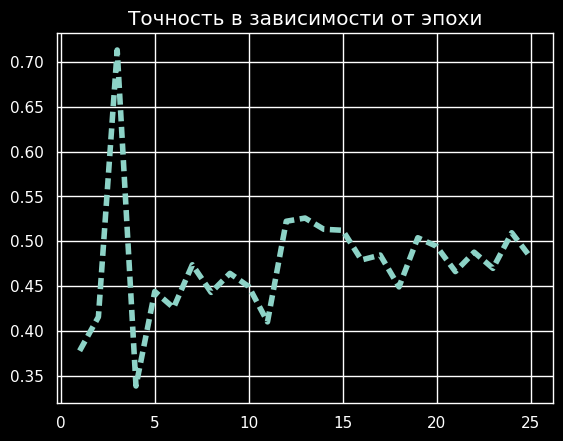

In [145]:
plt.style.use('dark_background')
plt.plot(
    df['epoch'], 
    df['metrics/precision(B)'], 
    linewidth=4, 
    linestyle=(0, (2, 1))
)
plt.title('Точность в зависимости от эпохи')